In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)

import astropy.units as u
from astropy.time import Time
from astropy.coordinates import SkyCoord, EarthLocation, AltAz, ICRS

In [2]:
# Input the position and proper motion information of the Canopus from Hiparcus
hip30438 = SkyCoord(ra=95.98787790*u.deg, dec=-52.69571787*u.deg,
                    frame="icrs")

In [3]:
shangqiu = EarthLocation(lat=36.2*u.deg, lon=117.1*u.deg, height=1500*u.m)
utcoffset = + 8*u.hour  # Daylight Time
time = Time("2018-9-22 23:00:00") - utcoffset

In [4]:
# Canopus
hip30438altaz = hip30438.transform_to(AltAz(obstime=time, location=shangqiu))
print("HIP 30438's Altitude = {0.alt:.2}".format(hip30438altaz))

HIP 30438's Altitude = -4.1e+01 deg


In [5]:
# Can I
hip26727 = SkyCoord.from_name("HIP 26727")

# Can II
hip26311 = SkyCoord.from_name("HIP 26311")

# Can II
hip25930 = SkyCoord.from_name("HIP 25930")

print(hip26727, hip26311, hip25930)

<SkyCoord (ICRS): (ra, dec) in deg
    (85.18969443, -1.94257359)> <SkyCoord (ICRS): (ra, dec) in deg
    (84.05338894, -1.20191914)> <SkyCoord (ICRS): (ra, dec) in deg
    (83.00166706, -0.29909511)>


In [6]:
midnight = Time("2018-9-23 00:00:00") - utcoffset
delta_midnight = np.linspace(-2, 10, 100) * u.hour
frame_Sep23 = AltAz(obstime=midnight + delta_midnight,
                          location=shangqiu)
m33altazs_Sep23 = hip30438.transform_to(frame_Sep23)

In [7]:
from astropy.coordinates import get_sun
delta_midnight = np.linspace(-12, 12, 1000)*u.hour
times_Sep23_to_24 = midnight + delta_midnight
frame_Sep23_to_24 = AltAz(obstime=times_Sep23_to_24, location=shangqiu)
sunaltazs_Sep23_to_24 = get_sun(times_Sep23_to_24).transform_to(frame_Sep23_to_24)

In [8]:
hip30438altazs_Sep23_to_24 = hip30438.transform_to(frame_Sep23_to_24)

hip26727altazs_Sep23_to_24 = hip26727.transform_to(frame_Sep23_to_24)
hip26311altazs_Sep23_to_24 = hip26311.transform_to(frame_Sep23_to_24)
hip25930altazs_Sep23_to_24 = hip25930.transform_to(frame_Sep23_to_24)


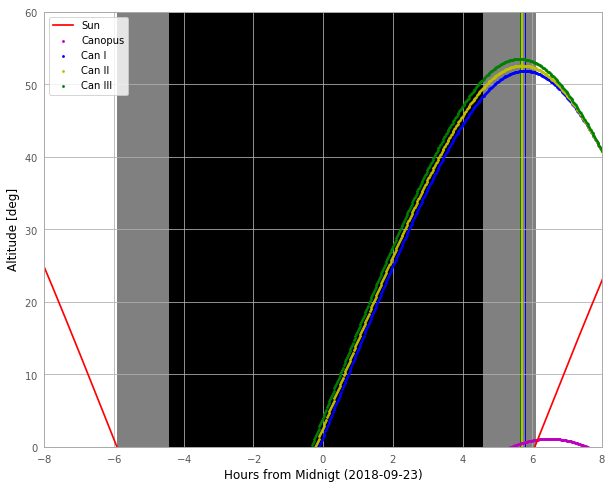

In [9]:
plt.figure(figsize=(10, 8))
plt.plot(delta_midnight, sunaltazs_Sep23_to_24.alt, color="r", label="Sun")
plt.scatter(delta_midnight, hip30438altazs_Sep23_to_24.alt,
            label="Canopus", lw=0, s=8, color="m")

plt.scatter(delta_midnight, hip26727altazs_Sep23_to_24.alt,
            label="Can I", lw=0, s=8, color="b")
plt.scatter(delta_midnight, hip26311altazs_Sep23_to_24.alt,
            label="Can II", lw=0, s=8, color="y")
plt.scatter(delta_midnight, hip25930altazs_Sep23_to_24.alt,
            label="Can III", lw=0, s=8, color="g")

plt.fill_between(delta_midnight.to('hr').value, 0, 90,
                 sunaltazs_Sep23_to_24.alt < -0*u.deg, color="0.5", zorder=0)
plt.fill_between(delta_midnight.to('hr').value, 0, 90,
                 sunaltazs_Sep23_to_24.alt < -18*u.deg, color="k", zorder=0)

plt.fill_between(delta_midnight.to('hr').value, 0, 90,
                 (179.5*u.deg < hip26727altazs_Sep23_to_24.az) & 
                 (hip26727altazs_Sep23_to_24.az < 180.5*u.deg), 
                 color="b", zorder=0)
plt.fill_between(delta_midnight.to('hr').value, 0, 90,
                 (179.5*u.deg < hip26311altazs_Sep23_to_24.az) & 
                 (hip26311altazs_Sep23_to_24.az < 180.5*u.deg), 
                 color="y", zorder=0)
plt.fill_between(delta_midnight.to('hr').value, 0, 90,
                 (179.5*u.deg < hip25930altazs_Sep23_to_24.az) & 
                 (hip25930altazs_Sep23_to_24.az < 180.5*u.deg), 
                 color="g", zorder=0)


plt.legend(loc='upper left')
plt.xlim(-8, 8)
plt.xticks(np.arange(-8, 9, 2))
plt.ylim(0, 60)
plt.xlabel('Hours from Midnigt (2018-09-23)')
plt.ylabel('Altitude [deg]')
plt.savefig("/Users/Neo/Desktop/can_three_autumnal.png", dpi=100)
plt.savefig("can_three_autumnal.png", dpi=100)